# Подготовка к работе

Загружаем необходимые библиотеки

In [404]:
import pandas as pd
import numpy as np
import seaborn as sns
import openpyxl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Загружаем датасет

In [405]:
df_bp=pd.read_excel('X_bp.xlsx', index_col=0)
df_nup=pd.read_excel('X_nup.xlsx', index_col=0)

In [406]:
df_bp.drop(df_bp.index[0:23],inplace=True)
df_bp=df_bp.reset_index(drop=True)

In [407]:
df_nup.drop(df_nup.index[0:40],inplace=True)
df_nup=df_nup.reset_index(drop=True)

In [408]:
df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')

# Разведочный анализ данных и препроцессинг

In [409]:
df.duplicated().sum()

0

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки, град                    1000 non-null   float64
 11  Шаг нашивки       

In [411]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
df.describe()

C:\Users\azaro\AppData\Local\Temp\ipykernel_3168\2192590377.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1000.000000       1000.000000   
mean                          2.930612       1975.666791   
std                           0.913939         73.796817   
min                           0.389403       1731.764635   
25%                           2.318526       1924.203433   
50%                           2.907832       1977.574305   
75%                           3.552539       2021.159498   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1000.000000                  1000.000000   
mean              739.950520                   110.541116   
std               330.327013                    28.304470   
min                 2.436909                    17.740275   
25%               498.438068                    92.170589   
50%               741.148111                   110.162666   
75%               962.851423                   130.311975   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1000.000000               1000.000000   
mean                         22.243850                285.911287   
std                           2.406999                 40.962756   
min                          14.254985                160.255843   
25%                          20.558296                258.539199   
50%                          22.230761                285.853960   
75%                          23.982115                313.581449   
max                          28.955094                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1000.000000                           1000.000000   
mean                      483.024665                             73.328462   
std                       280.811736                              3.119584   
min                         0.603740                             64.054061   
25%                       268.057473                             71.301753   
50%                       452.972263                             73.247594   
75%                       694.210382                             75.379739   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1000.000000              1000.000000   
mean                     2467.184290               218.386876   
std                       485.624616                59.819777   
min                      1036.856605                33.803026   
25%                      2143.834592               179.190489   
50%                      2461.249253               217.277006   
75%                      2760.163022               257.495647   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1000.000000  1000.000000        1000.000000  
mean            45.000000     6.911840          57.245335  
std             45.022517     2.557834          12.338871  
min              0.000000     0.037639          11.740126  
25%              0.000000     5.139108          49.970740  
50%             45.000000     6.913444          57.413594  
75%             90.000000     8.566744          65.107235  
max             90.000000    14.440522         103.988901

Гистограммы распределения переменных

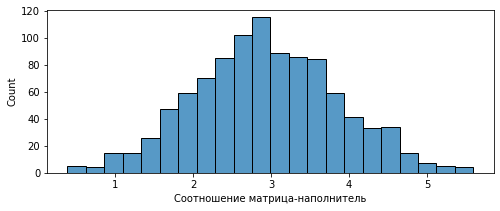

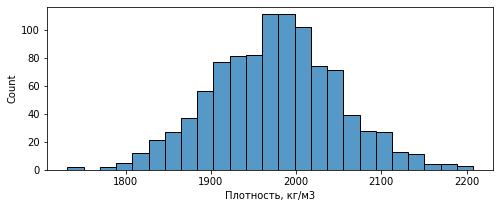

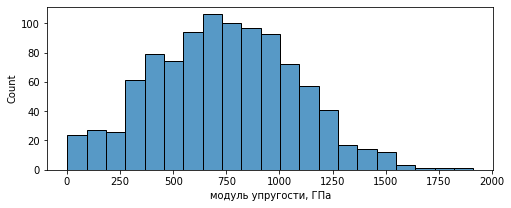

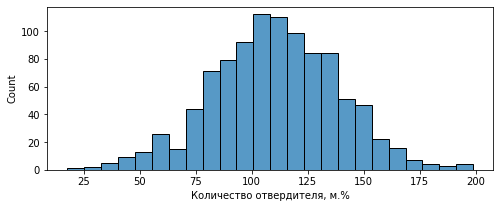

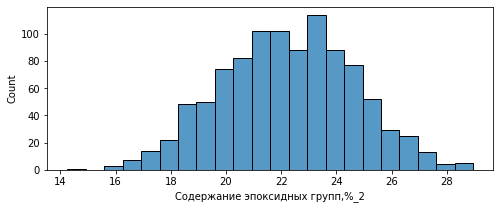

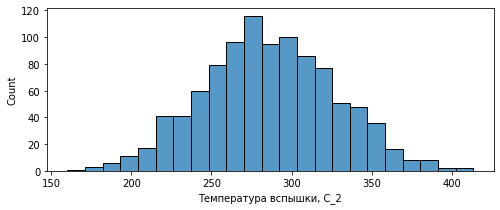

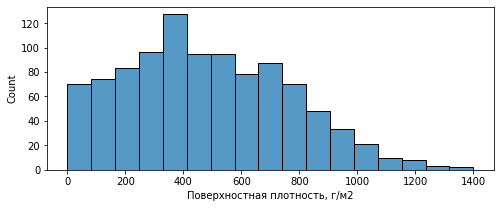

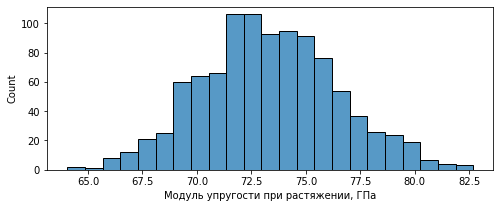

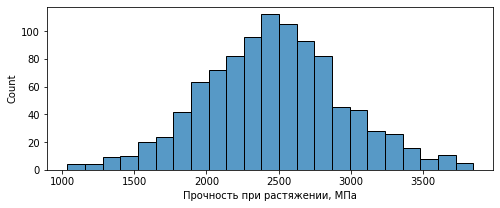

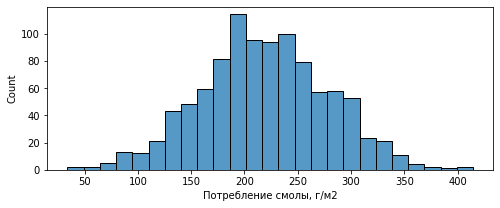

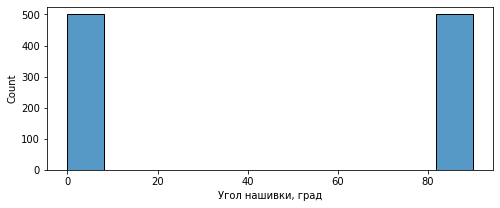

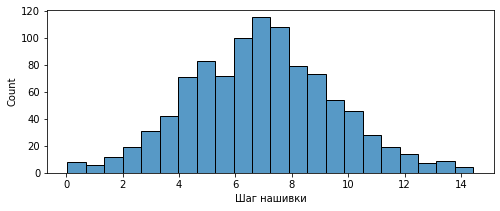

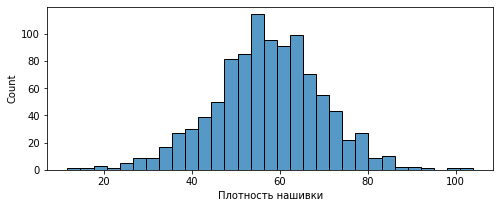

In [412]:
for col in df.columns: 
  plt.figure(figsize=(8, 3))
  sns.histplot(data=df[col])
  plt.show()

Ящики с усами

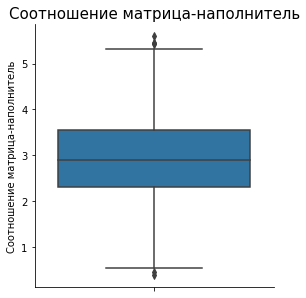

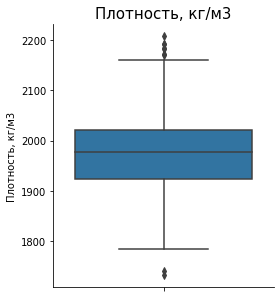

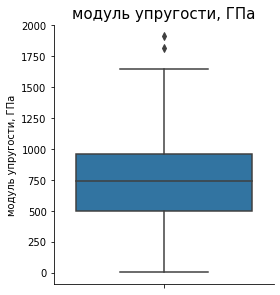

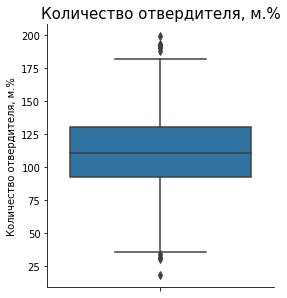

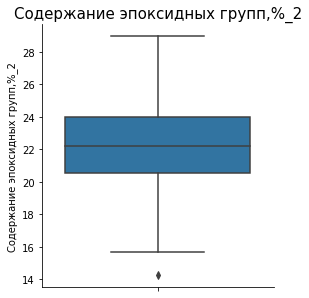

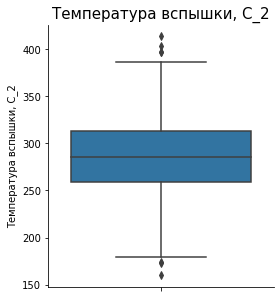

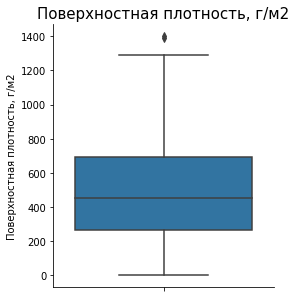

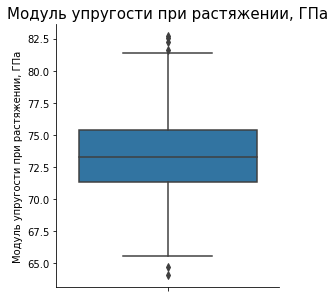

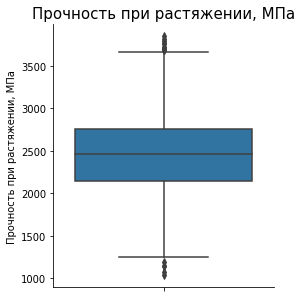

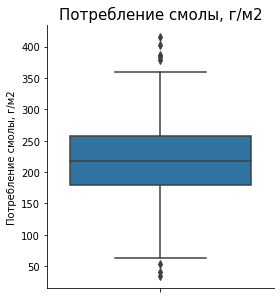

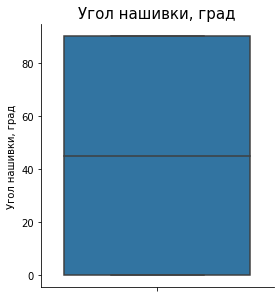

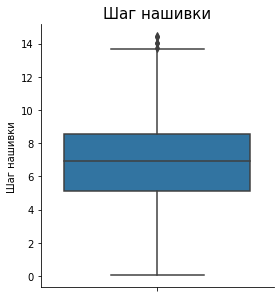

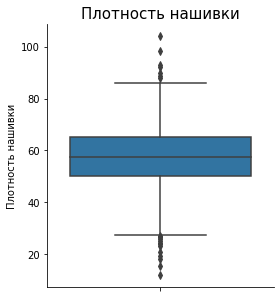

In [413]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box', height=4)
    plt.title(col, fontsize=15)

Попарные графики рассеяния точек

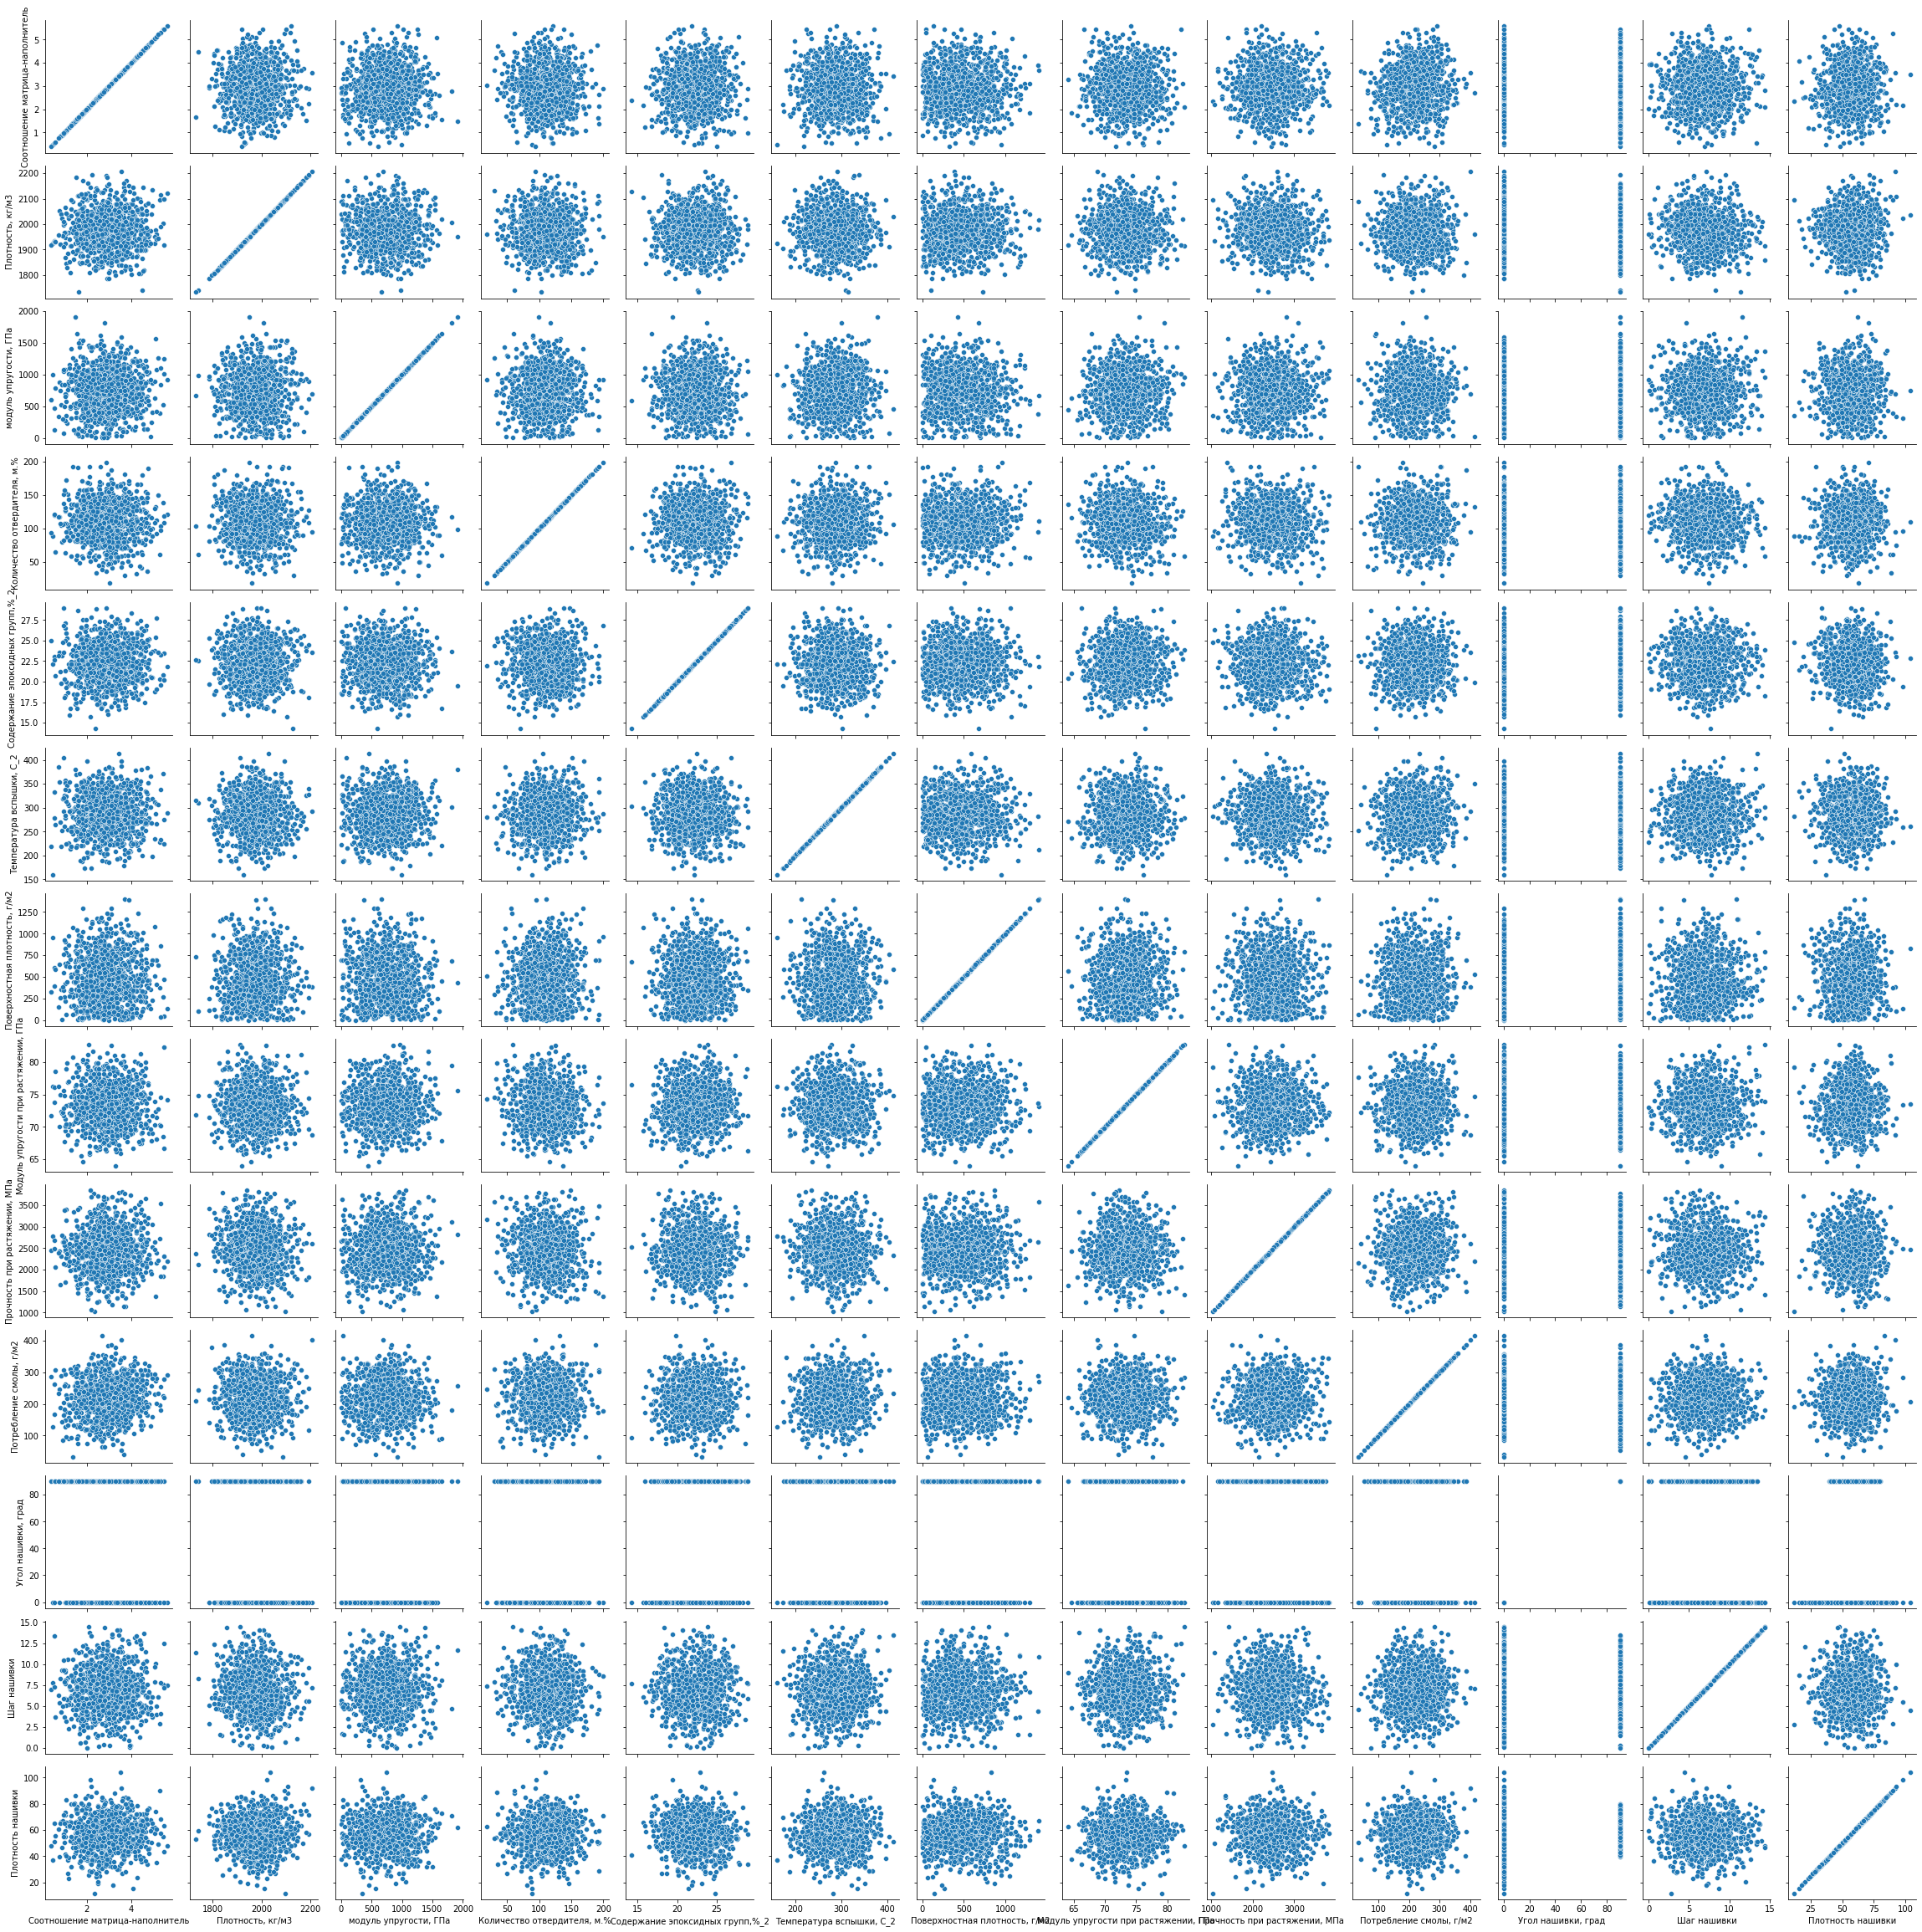

In [414]:
cols = df.columns
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

Проверка корреляции данных

<AxesSubplot:>

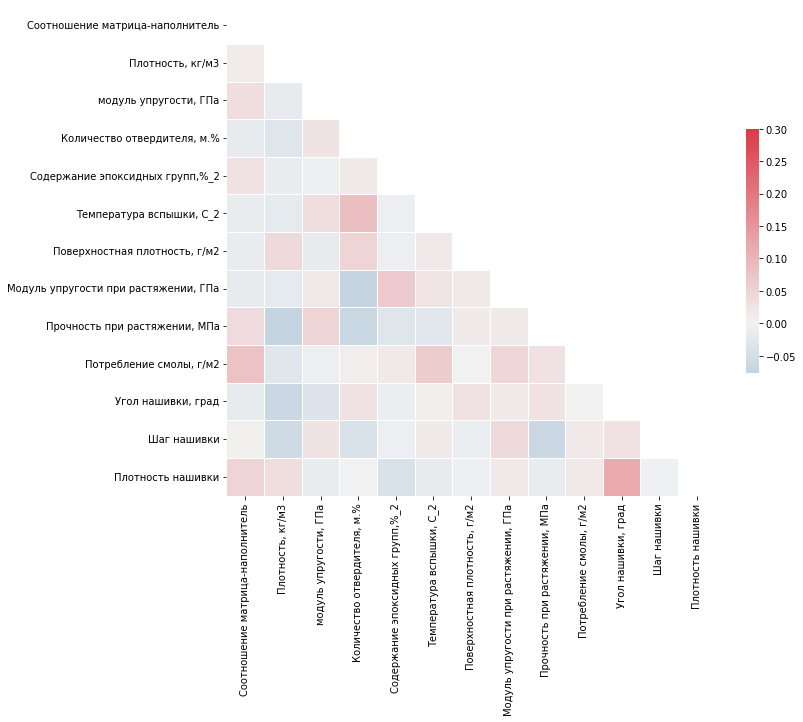

In [415]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [416]:
le = LabelEncoder()
df['Угол нашивки, град'] = le.fit_transform(df['Угол нашивки, град'])

In [417]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [418]:
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [419]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             11
Содержание эпоксидных групп,%_2          1
Температура вспышки, С_2                 7
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              5
Плотность нашивки                       20
dtype: int64

In [420]:
df = df.fillna(df.mean())

In [421]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           2.587348       1953.274926            1136.596135   
1                           2.499918       1942.595777             901.519947   
2                           2.046471       2037.631811             707.570887   
3                           1.856476       2018.220332             836.294382   
4                           3.305535       1917.907506             478.286247   
..                               ...               ...                    ...   
995                         2.271346       1952.087902             912.855545   
996                         3.444022       2050.089171             444.732634   
997                         3.280604       1972.372865             416.836524   
998                         3.705351       2066.799773             741.475517   
999                         3.808020       1890.413468             417.316232   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     137.627420                        22.344534   
1                     146.252208                        23.081757   
2                     101.617251                        23.146393   
3                     135.401697                        26.435515   
4                     105.786930                        17.874100   
..                           ...                              ...   
995                    86.992183                        20.123249   
996                   145.981978                        19.599769   
997                   110.533477                        23.957502   
998                   141.397963                        19.246945   
999                   129.183416                        27.474763   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  234.716883                     555.893453   
1                  351.231874                     864.725484   
2                  312.307205                     547.601219   
3                  327.510377                     150.961449   
4                  328.154579                     526.692159   
..                        ...                            ...   
995                324.774576                     209.198700   
996                254.215401                     350.660830   
997                248.423047                     740.142791   
998                275.779840                     641.468152   
999                300.952708                     758.747882   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                               80.803222                    2587.342983   
1                               76.178075                    2461.013491   
2                               73.817067                    2624.026407   
3                               77.210762                    2473.187195   
4                               72.345709                    3059.032991   
..                                    ...                            ...   
995                             73.090961                    2387.292495   
996                             72.920827                    2360.392784   
997                             74.734344                    2662.906040   
998                             74.042708                    2071.715856   
999                             74.309704                    2856.328932   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                 246.613117                 0.0     7.856167   
1                 226.222760                 0.0     7.401543   
2                 178.198556                 0.0     6.675780   
3                 123.344561                 0.0     7.526398   
4                 275.575880                 0.0     8.325699   
..                       ...                 ...          ...   
995               125.007669                 1.0     8.088111   
9

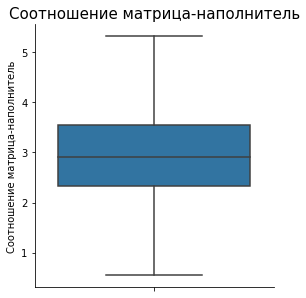

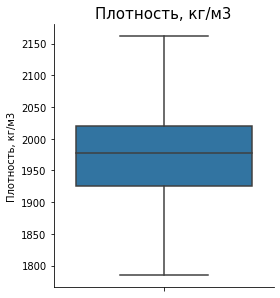

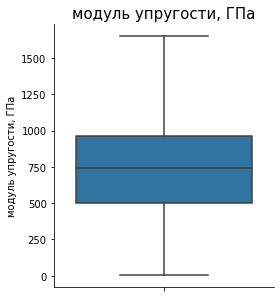

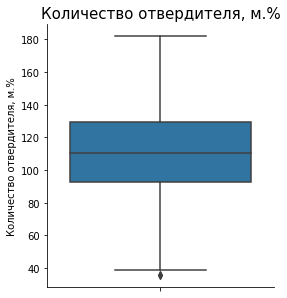

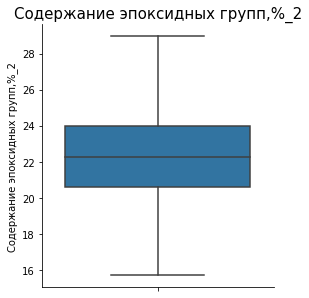

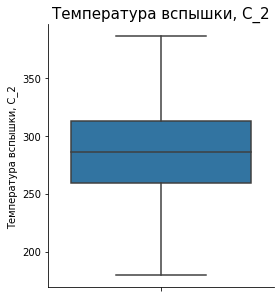

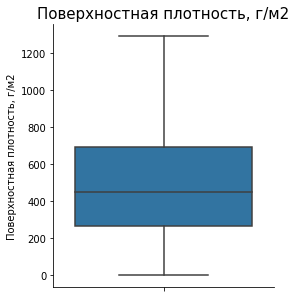

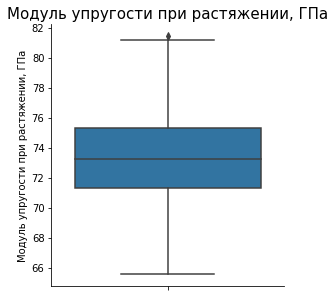

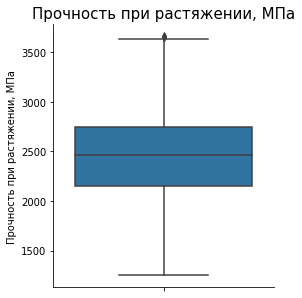

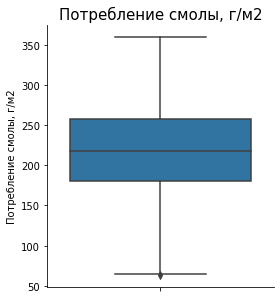

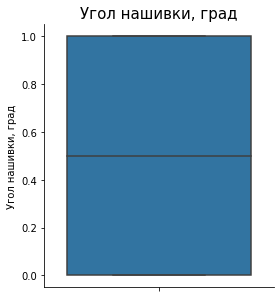

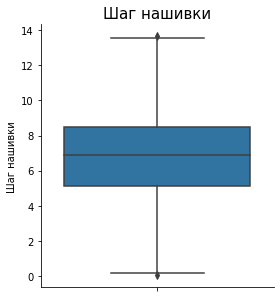

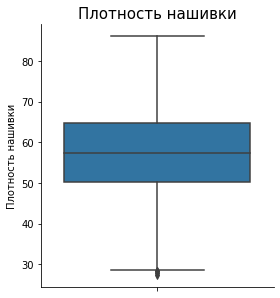

In [422]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box', height=4)
    plt.title(col, fontsize=15)

In [423]:
scaler = MinMaxScaler()
norm_df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 

In [424]:
norm_df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1000.000000       1000.000000   
mean                          0.498871          0.504349   
std                           0.187243          0.187874   
min                           0.000000          0.000000   
25%                           0.372274          0.373224   
50%                           0.495936          0.510193   
75%                           0.629517          0.624999   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1000.000000                  1000.000000   
mean                0.446431                     0.510810   
std                 0.198219                     0.184380   
min                 0.000000                     0.000000   
25%                 0.301158                     0.388979   
50%                 0.447409                     0.510810   
75%                 0.582724                     0.642937   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1000.000000               1000.000000   
mean                          0.494446                  0.514862   
std                           0.180530                  0.192438   
min                           0.000000                  0.000000   
25%                           0.367716                  0.384370   
50%                           0.493380                  0.514862   
75%                           0.624941                  0.646752   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1000.000000                           1000.000000   
mean                        0.372340                              0.488988   
std                         0.215244                              0.191726   
min                         0.000000                              0.000000   
25%                         0.207210                              0.363531   
50%                         0.350473                              0.486229   
75%                         0.535889                              0.616072   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1000.000000              1000.000000   
mean                        0.502320                 0.522574   
std                         0.190211                 0.195420   
min                         0.000000                 0.000000   
25%                         0.373527                 0.393161   
50%                         0.502320                 0.522574   
75%                         0.622739                 0.653998   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          1000.00000  1000.000000        1000.000000  
mean              0.50000     0.502186           0.513803  
std               0.50025     0.184048           0.191451  
min               0.00000     0.000000           0.000000  
25%               0.00000     0.374658           0.392331  
50%               0.50000     0.503384           0.513803  
75%               1.00000     0.622550           0.638842  
max               1.00000     1.000000           1.000000

In [425]:
norm_df

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.427955          0.447627               0.688630   
1                           0.409614          0.419307               0.545898   
2                           0.314487          0.671337               0.428138   
3                           0.274628          0.619859               0.506295   
4                           0.578621          0.353835               0.288923   
..                               ...               ...                    ...   
995                         0.361662          0.444480               0.552781   
996                         0.607674          0.704373               0.268550   
997                         0.573391          0.498274               0.251612   
998                         0.662497          0.748688               0.448724   
999                         0.684036          0.280923               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.697727                         0.501436   
1                       0.756708                         0.557037   
2                       0.451468                         0.561912   
3                       0.682506                         0.809975   
4                       0.479982                         0.164279   
..                           ...                              ...   
995                     0.351453                         0.333908   
996                     0.754860                         0.294428   
997                     0.512442                         0.623085   
998                     0.723512                         0.267818   
999                     0.639982                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.267751                       0.430212   
1                    0.831460                       0.669480   
2                    0.643139                       0.423787   
3                    0.716694                       0.116490   
4                    0.719810                       0.407588   
..                        ...                            ...   
995                  0.703458                       0.161609   
996                  0.362087                       0.271207   
997                  0.334063                       0.572959   
998                  0.466417                       0.496511   
999                  0.588206                       0.587373   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.961302                       0.554738   
1                                0.669748                       0.502320   
2                                0.520918                       0.569959   
3                                0.734845                       0.507371   
4                                0.428168                       0.750455   
..                                    ...                            ...   
995                              0.475147                       0.471731   
996                              0.464422                       0.460570   
997                              0.578740                       0.586091   
998                              0.535142                       0.340790   
999                              0.551972                       0.666348   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.619323                 0.0     0.574202   
1                   0.550289                 0.0     0.540813   
2                   0.387697                 0.0     0.487513   
3                   0.201982                 0.0     0.549983   
4                   0.717380                 0.0     0.608685   
..                       ...                 ...          ...   
995                 0.207613                 1.0     0.591236   
9

# Модуль упругости при растяжении

In [ ]:
Models_metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R squared'])
X = norm_df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
Y = norm_df['Модуль упругости при растяжении, ГПа']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

Предсказание в виде среднего значения (для сравнения)

In [ ]:
MR_1 = DummyRegressor(strategy="mean").fit(X_train,Y_train)

In [ ]:
Mean_predict_1 = MR_1.predict(X_test)

In [ ]:
new_row = {
   'Model': 'Среднее значение', 
   'MAE': mean_absolute_error(Y_test, Mean_predict_1),
   'MSE': mean_squared_error(Y_test, Mean_predict_1), 
   'R squared': r2_score(Y_test, Mean_predict_1)
}
Models_metrics = Models_metrics.append(new_row, ignore_index=True)

Линейная регрессия

In [ ]:
LR_model_1 = LinearRegression().fit(X_train,Y_train)

In [ ]:
LR_predict_1=LR_model_1.predict(X_test)

In [ ]:
new_row = {
   'Model': 'Линейная регрессия', 
   'MAE': mean_absolute_error(Y_test, LR_predict_1),
   'MSE': mean_squared_error(Y_test, LR_predict_1),
   'R squared': r2_score(Y_test, LR_predict_1)
}
Models_metrics = Models_metrics.append(new_row, ignore_index=True)

K ближайших соседей

In [ ]:
KNN_model_1 = KNeighborsRegressor(n_neighbors=5).fit(X_train,Y_train)

In [ ]:
KNN_predict_1=KNN_model_1.predict(X_test)

In [ ]:
new_row = {
   'Model': 'k-ближайших соседей', 
   'MAE': mean_absolute_error(Y_test, KNN_predict_1),
   'MSE': mean_squared_error(Y_test, KNN_predict_1),
   'R squared': r2_score(Y_test, KNN_predict_1)
}
Models_metrics = Models_metrics.append(new_row, ignore_index=True)

Случайный лес

In [ ]:
RF_model_1 = RandomForestRegressor(random_state = 7, criterion = 'absolute_error').fit(X_train,Y_train)

In [ ]:
RF_predict_1=RF_model_1.predict(X_test)

In [ ]:
new_row = {
   'Model': 'Случайный лес', 
   'MAE': mean_absolute_error(Y_test, RF_predict_1),
   'MSE': mean_squared_error(Y_test, RF_predict_1),
   'R squared': r2_score(Y_test, RF_predict_1)
}
Models_metrics = Models_metrics.append(new_row, ignore_index=True)

Сравнение качества полученных моделей

In [ ]:
Models_metrics

Подбор гиперпараметров для модели случайного леса путем поиска по сетке с перекрестной проверкой

In [ ]:
RF_model_tuned_1 = RandomForestRegressor(random_state = 7)
param_grid = {
   'n_estimators': [100, 200, 300],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [2,3,4],
   'criterion' :['absolute_error']
}
GSCV = GridSearchCV(estimator=RF_model_tuned_1, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, Y_train)
GSCV.best_params_ 

In [ ]:
GSCV.best_params_

In [ ]:
RF_model_tuned_1 = GSCV.best_estimator_.fit(X_train,Y_train)

In [ ]:
RF_tuned_predict_1 = RF_model_tuned_1.predict(X_test)

In [ ]:
new_row = {
   'Model': 'Случайный лес с подбором гиперпараметров', 
   'MAE': mean_absolute_error(Y_test, RF_tuned_predict_1),
   'MSE': mean_squared_error(Y_test, RF_tuned_predict_1), 
   'R squared': r2_score(Y_test, RF_tuned_predict_1)
}
Models_metrics = Models_metrics.append(new_row, ignore_index=True)

Подбор гиперпараметров для k-ближайших соседей путем поиска по сетке с перекрестной проверкой

In [ ]:
KNN_model_tuned_1 = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [3, 5, 7],
   'algorithm': ['ball_tree','kd_tree','brute'],
   'weights': ['uniform','distance']
}
GSCV = GridSearchCV(estimator=KNN_model_tuned_1, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, Y_train)
GSCV.best_params_ 

In [ ]:
GSCV.best_params_

In [ ]:
KNN_model_tuned_1 = GSCV.best_estimator_.fit(X_train,Y_train)

In [ ]:
KNN_tuned_predict_1 = KNN_model_tuned_1.predict(X_test)

In [ ]:
new_row = {
   'Model': 'k-ближайших соседей с подбором гиперпараметров', 
   'MAE': mean_absolute_error(Y_test, KNN_tuned_predict_1),
   'MSE': mean_squared_error(Y_test, KNN_tuned_predict_1), 
   'R squared': r2_score(Y_test, KNN_tuned_predict_1)
}
Models_metrics = Models_metrics.append(new_row, ignore_index=True)

Сравнение качества полученных моделей

In [ ]:
Models_metrics

# Прочность при растяжении

In [ ]:
Models_metrics_2 = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R squared'])
X = norm_df.drop(['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа'], axis=1)
Y = norm_df['Прочность при растяжении, МПа']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

Предсказание в виде среднего значения (для сравнения)

In [ ]:
MR_2 = DummyRegressor(strategy="mean").fit(X_train,Y_train)

In [ ]:
Mean_predict_2 = MR_2.predict(X_test)

In [ ]:
new_row = {
   'Model': 'Среднее значение', 
   'MAE': mean_absolute_error(Y_test, Mean_predict_2),
   'MSE': mean_squared_error(Y_test, Mean_predict_2), 
   'R squared': r2_score(Y_test, Mean_predict_2)
}
Models_metrics_2 = Models_metrics_2.append(new_row, ignore_index=True)

Линейная регрессия

In [ ]:
LR_model_2 = LinearRegression().fit(X_train,Y_train)

In [ ]:
LR_predict_2=LR_model_2.predict(X_test)

In [ ]:
new_row = {
   'Model': 'Линейная регрессия', 
   'MAE': mean_absolute_error(Y_test, LR_predict_2),
   'MSE': mean_squared_error(Y_test, LR_predict_2),
   'R squared': r2_score(Y_test, LR_predict_2)
}
Models_metrics_2 = Models_metrics_2.append(new_row, ignore_index=True)

K ближайших соседей

In [ ]:
KNN_model_2 = KNeighborsRegressor(n_neighbors=5).fit(X_train,Y_train)

In [ ]:
KNN_predict_2=KNN_model_2.predict(X_test)

In [ ]:
new_row = {
   'Model': 'K ближайших соседей', 
   'MAE': mean_absolute_error(Y_test, KNN_predict_2),
   'MSE': mean_squared_error(Y_test, KNN_predict_2), 
   'R squared': r2_score(Y_test, KNN_predict_2)
}
Models_metrics_2 = Models_metrics_2.append(new_row, ignore_index=True)

Случайный лес

In [ ]:
RF_model_2 = RandomForestRegressor(random_state = 7).fit(X_train,Y_train)

In [ ]:
RF_predict_2=RF_model_2.predict(X_test)

In [ ]:
new_row = {
   'Model': 'Случайный лес', 
   'MAE': mean_absolute_error(Y_test, RF_predict_2), 
   'MSE': mean_squared_error(Y_test, RF_predict_2),
   'R squared': r2_score(Y_test, RF_predict_2)
}
Models_metrics_2 = Models_metrics_2.append(new_row, ignore_index=True)

Сравнение качества полученных моделей

In [ ]:
Models_metrics_2

Подбор гиперпараметров для модели случайного леса путем поиска по сетке с перекрестной проверкой

In [ ]:
RF_model_tuned_2 = RandomForestRegressor(random_state = 7)
param_grid = {
   'n_estimators': [100, 200, 300],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [2,3,4],
   'criterion' :['absolute_error']
}
GSCV = GridSearchCV(estimator=RF_model_tuned_2, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, Y_train)
GSCV.best_params_ 

In [ ]:
RF_model_tuned_2 = GSCV.best_estimator_.fit(X_train,Y_train)

In [ ]:
RF_tuned_predict_2 = RF_model_tuned_2.predict(X_test)

In [ ]:
new_row = {
   'Model': 'Случайный лес с подбором гиперпараметров',
   'MAE': mean_absolute_error(Y_test, RF_tuned_predict_2), 
   'MSE': mean_squared_error(Y_test, RF_tuned_predict_2), 
   'R squared': r2_score(Y_test, RF_tuned_predict_2)
}
Models_metrics_2 = Models_metrics_2.append(new_row, ignore_index=True)

Подбор гиперпараметров для k-ближайших соседей путем поиска по сетке с перекрестной проверкой

In [ ]:
KNN_model_tuned_2 = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [3, 5, 7, 10],
}
GSCV = GridSearchCV(estimator=KNN_model_tuned_2, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, Y_train)
GSCV.best_params_ 

In [ ]:
KNN_model_tuned_2 = GSCV.best_estimator_.fit(X_train,Y_train)

In [ ]:
KNN_tuned_predict_2 = KNN_model_tuned_2.predict(X_test)

In [ ]:
new_row = {
   'Model': 'k-ближайших соседей с подбором гиперпараметров', 
   'MAE': mean_absolute_error(Y_test, KNN_tuned_predict_2),
   'MSE': mean_squared_error(Y_test, KNN_tuned_predict_2), 
   'R squared': r2_score(Y_test, KNN_tuned_predict_2)
}
Models_metrics_2 = Models_metrics_2.append(new_row, ignore_index=True)

Сравнение качества полученных моделей

In [229]:
Models_metrics_2

Model       MAE       MSE  \
0                                Среднее значение  0.166001  0.041984   
1                              Линейная регрессия  0.165852  0.041568   
2                             K ближайших соседей  0.187441  0.051735   
3                                   Случайный лес  0.168972  0.043349   
4        Случайный лес с подбором гиперпараметров  0.165798  0.041662   
5  k-ближайших соседей с подбором гиперпараметров  0.182215   0.04804   

  R squared  
0 -0.005715  
1  0.004239  
2 -0.239314  
3 -0.038417  
4  0.001984  
5 -0.150799

# Соотношение матрица-наполнитель

In [764]:
Models_metrics_3 = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R squared'])
X = norm_df.drop(['Соотношение матрица-наполнитель'], axis=1)
Y = norm_df['Соотношение матрица-наполнитель']

In [765]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [766]:
MR_3 = DummyRegressor(strategy="mean").fit(X_train,Y_train)

In [767]:
Mean_predict_3 = MR_3.predict(X_test)

In [768]:
new_row = {
   'Model': 'Среднее значение', 
   'MAE': mean_absolute_error(Y_test, Mean_predict_3), 
   'MSE': mean_absolute_error(Y_test, Mean_predict_3), 
   'R squared': r2_score(Y_test, Mean_predict_3)
}
Models_metrics_3 = Models_metrics_3.append(new_row, ignore_index=True)

C:\Users\azaro\AppData\Local\Temp\ipykernel_3168\1708468605.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_metrics_3 = Models_metrics_3.append(new_row, ignore_index=True)


In [769]:
norm_array = np.array(X_train)
normalizer = layers.Normalization(input_shape=[12,], axis=None)
normalizer.adapt(norm_array)

In [770]:
matrix_NN = keras.Sequential([
      normalizer,
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(1)
    ])

In [771]:
matrix_NN.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.005))

In [772]:
matrix_NN.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 12)               3         
 tion)                                                           
                                                                 
 dense_192 (Dense)           (None, 512)               6656      
                                                                 
 dense_193 (Dense)           (None, 512)               262656    
                                                                 
 dense_194 (Dense)           (None, 512)               262656    
                                                                 
 dense_195 (Dense)           (None, 512)               262656    
                                                                 
 dense_196 (Dense)           (None, 1)                 513       
                                                     

In [773]:
%%time
history = nnet_model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    verbose=1, epochs=20)

Epoch 1/20
18/18 [==============================] - 0s 10ms/step - loss: 0.1318 - val_loss: 0.1736
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1290 - val_loss: 0.1654
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1301 - val_loss: 0.1697
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1297 - val_loss: 0.1639
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1281 - val_loss: 0.1723
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1280 - val_loss: 0.1660
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1259 - val_loss: 0.1704
Epoch 8/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1248 - val_loss: 0.1698
Epoch 9/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1287 - val_loss: 0.1772
Epoch 10/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1303 - val_loss: 0.1635
Epoch 11/20
18/18 

In [774]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 3])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)

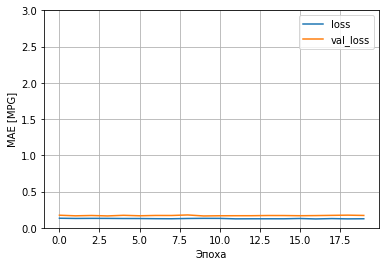

In [775]:
plot_loss(history)

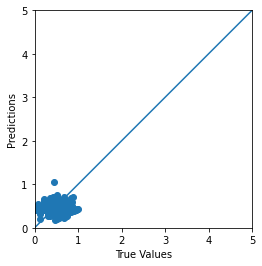

In [776]:
Seq_predict = nnet_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, Seq_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

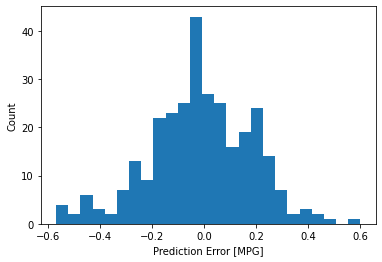

In [777]:
error = Seq_predict - Y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [778]:
new_row = {
   'Model': 'sequential', 
   'MAE': mean_absolute_error(Y_test, Seq_predict),
   'MSE': mean_absolute_error(Y_test, Seq_predict), 
   'R squared': r2_score(Y_test, Seq_predict)
}
Models_metrics_3 = Models_metrics_3.append(new_row, ignore_index=True)

C:\Users\azaro\AppData\Local\Temp\ipykernel_3168\2581669130.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_metrics_3 = Models_metrics_3.append(new_row, ignore_index=True)


In [779]:
Models_metrics_3

Model       MAE       MSE R squared
0  Среднее значение  0.145137  0.145137 -0.000475
1        sequential  0.155474  0.155474 -0.193759

# Сохранение модели нейронной сети для прогноза параметра "Соотношение матрица-наполнитель"

In [780]:
nnet_model.save("models/Matrix_Filler_NN")

INFO:tensorflow:Assets written to: models/Matrix_Filler_NN\assets
